Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [338]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import itertools

from datetime import datetime
import matplotlib.pyplot as plt



In [339]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv("movies.csv")
movies_df.head(10)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [340]:
# code here
movies_df.drop(columns = ["keywords", "homepage", "status", "tagline", "original_language", "overview", "production_companies", "original_title"], inplace=True)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [341]:
# Drop duplicate rows based on "genres" column


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [342]:
# Filter movies with non-zero/non-NaN budget and revenue
filtered_movies_df = movies_df[(movies_df['budget'] != 0) & (movies_df['revenue'].notna())]

# Print the filtered DataFrame
filtered_movies_df


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4791,13,"[{""id"": 27, ""name"": ""Horror""}]",157185,0.332679,"[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}]",2007-01-01,0,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Tin Can Man,2.0,1
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Cure,7.4,63
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [343]:
# Convert "release_date" column to DateTime column
filtered_movies_df['release_date'] = pd.to_datetime(filtered_movies_df['release_date'])

# Extract the year from the date
filtered_movies_df['year'] = filtered_movies_df['release_date'].dt.year

# Drop the original "release_date" column
filtered_movies_df = filtered_movies_df.drop("release_date", axis=1)

# Show the updated DataFrame
filtered_movies_df


C:\Users\Tsholo\AppData\Local\Temp\ipykernel_9012\1615280112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies_df['release_date'] = pd.to_datetime(filtered_movies_df['release_date'])
C:\Users\Tsholo\AppData\Local\Temp\ipykernel_9012\1615280112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies_df['year'] = filtered_movies_df['release_date'].dt.year


,budget,genres,id,popularity,production_countries,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
4791,13,"[{""id"": 27, ""name"": ""Horror""}]",157185,0.332679,"[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}]",0,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Tin Can Man,2.0,1,2007
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Cure,7.4,63,1997
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658,2004
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238,1992


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [344]:
# code here
# Convert the budget and revenue columns to integer format
filtered_movies_df["budget"] = filtered_movies_df["budget"].astype(np.int64)
filtered_movies_df["revenue"] = filtered_movies_df["revenue"].astype(np.int64)

# Show the updated DataFrame with integer format for "budget" and "revenue" columns
filtered_movies_df

,budget,genres,id,popularity,production_countries,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
4791,13,"[{""id"": 27, ""name"": ""Horror""}]",157185,0.332679,"[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}]",0,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Tin Can Man,2.0,1,2007
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Cure,7.4,63,1997
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658,2004
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238,1992


On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

In [345]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted

    Results:
        movies_df will have column dropped and replaced with a new column for each unique value
        For example, if the "genres" column had an "Action" in it, there will be a new column
        called "genres_Action". Every movie that had the "Action" genre will have a 1 in that column,
        and 0 otherwise.
    """
    global movies_df # ensure that we can directly manipulate movies_df
    new_columns = {} # Keeps a track of all unique names
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        # For each Dataframe index, zipped with a JSON object for that column
        # We want to get a list of all of the items associated with 'key'
        list1=[]
        for j in range(len(i)):
            # For each item in the current JSON object
            list1.append((i[j][key]))# Append the item to a list
        for item in list1:
            # For each item found, append to movies_df
            if f"{column}_{item}" not in new_columns.keys():
                # If this item doesn't have a corresponding column, create one
                new_columns[f"{column}_{item}"] = np.array([0] * movies_df.shape[0])
            new_columns[f"{column}_{item}"][index] = 1
    # Concatenate new columns to movies_df
    movies_df = pd.concat([movies_df, pd.DataFrame(new_columns)], axis=1).drop(column, axis=1)
            
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')


movies_df.columns["Action"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Finding Certain Genres
Let's say that we want to locate all movies in the "Action" genre. With this new format, it becomes a simple matter.


In [ ]:
action_movies = movies_df[movies_df.genres_Action == 1]
action_movies

In [ ]:
comedy_movies = movies_df[movies_df.production_countries_Algeria == 1]
comedy_movies

### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [ ]:
# Code here
most_expensive_movies = filtered_movies_df.sort_values("budget", ascending=False)[["title", "budget"]]
print("The top 5 most expensive movies are: ")
most_expensive_movies.head(5)

In [ ]:
least_expensive_movies = filtered_movies_df.sort_values("budget", ascending=True)[["title", "budget"]]
print("The top 5 least expensive movies are: ")
least_expensive_movies.head(5)

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [ ]:
# code here
# Get the difference between the budget and revenue generated
filtered_movies_df["profit_loss"] = filtered_movies_df["revenue"] - filtered_movies_df["budget"]
profit_sorted_movies_df = filtered_movies_df.sort_values("profit_loss", ascending=False)
profit_sorted_movies_df[["budget", "revenue", "profit_loss", "title"]].head(5)


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [ ]:
# Code here
popular_movies_df = filtered_movies_df[filtered_movies_df["vote_average"] >= 7]
# Sort the filtered DataFrame by vote_average in descending order
popular_movies_df = popular_movies_df.sort_values(by="vote_average", ascending=False)
popular_movies_df[["title", "vote_average"]]

,title,vote_average
4247,Me You and Five Bucks,10.0
2970,There Goes My Baby,8.5
1881,The Shawshank Redemption,8.5
3337,The Godfather,8.4
3232,Pulp Fiction,8.3
...,...,...
842,Paddington,7.0
3911,Krush Groove,7.0
823,Crimson Tide,7.0
3229,Quo Vadis,7.0


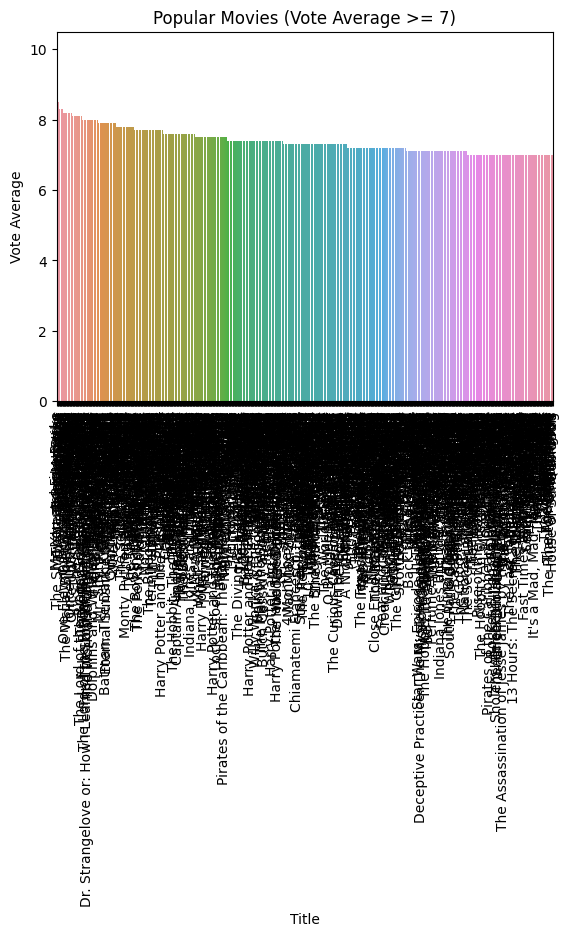

In [ ]:
# Create a bar plot of title vs vote_average
sns.barplot(x="title", y="vote_average", data=popular_movies_df)
plt.xticks(rotation=90)
plt.xlabel('Title')
plt.ylabel('Vote Average')
plt.title('Popular Movies (Vote Average >= 7)')
plt.show()

The top 3 liked movies are : Me, You and Five Bucks, There Goes My Baby and The Shawshank Redemption

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [ ]:
# Convert 'genres' column to list of dictionaries
filtered_movies_df['genres'] = filtered_movies_df['genres'].apply(ast.literal_eval)

# Extract genre names from the list of dictionaries
genre_names = filtered_movies_df['genres'].apply(lambda x: [genre['name'] for genre in x])

# Flatten the list of genre names into individual rows
genre_names = genre_names.explode()

# Count the occurrences of each genre
genre_counts = genre_names.value_counts()

# Convert genre_counts series to a dataframe
genre_counts_df = genre_counts.to_frame().reset_index()

# Rename the columns for clarity
genre_counts_df.columns = ['genre', 'count']


In [ ]:
# Display the resulting dataframe
genre_counts_df

,genre,count
0,Drama,1733
1,Comedy,1311
2,Thriller,1073
3,Action,1015
4,Adventure,719
5,Romance,680
6,Crime,595
7,Science Fiction,475
8,Family,410
9,Horror,407


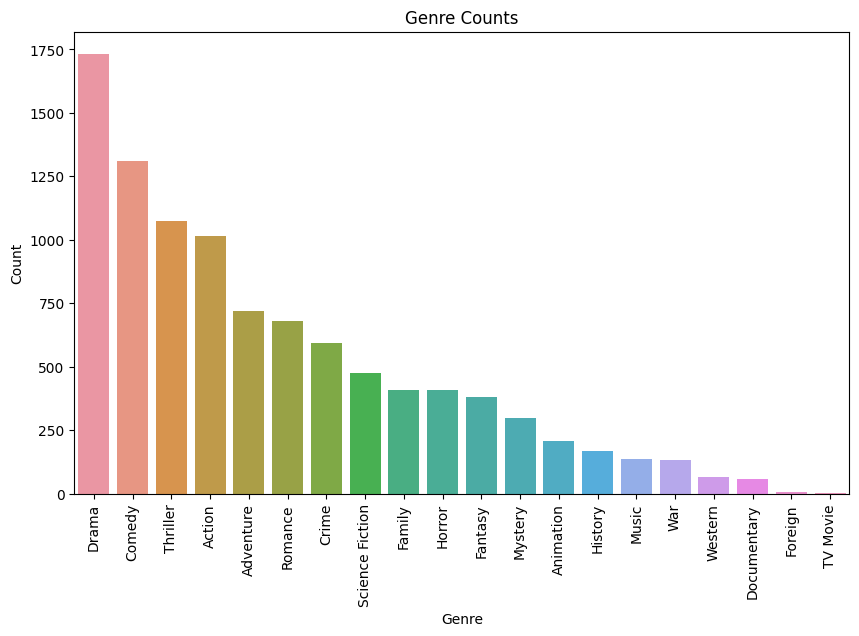

In [ ]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot of genre counts using seaborn
sns.barplot(x='genre', y='count', data=genre_counts_df, ax=ax)

# Set the labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Genre Counts')

# Rotate the x-axis labels for better readability
ax.tick_params(axis='x', rotation=90)

# Display the plot
plt.show()

The most popular movies genres are: Drama, Comedy and Thriller

#### Generate three different interesting visualisations with a data story.

In [351]:
# Group movies by year and calculate count
movies_count_by_year = filtered_movies_df.groupby('year').size().reset_index(name='Count')

# Sort by descending order
movies_count_by_year = movies_count_by_year.sort_values('Count', ascending=False)

# Display the movies count by year sorted by descending order
movies_count_by_year

,year,Count
83,2011,195
81,2009,186
85,2013,185
82,2010,185
78,2006,180
...,...,...
5,1932,1
4,1930,1
3,1929,1
2,1927,1


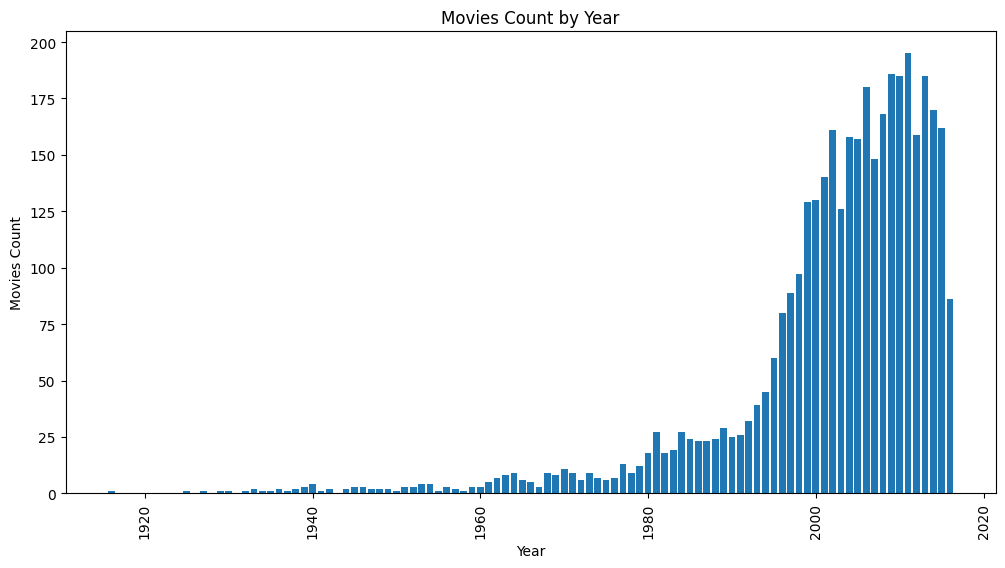

In [352]:
# Create a bar plot for movies count by year
plt.figure(figsize=(12, 6)) # Set the figure size
plt.bar(movies_count_by_year['year'], movies_count_by_year['Count'])
plt.xlabel('Year') # Set x-axis label
plt.ylabel('Movies Count') # Set y-axis label
plt.title('Movies Count by Year') # Set plot title
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show() # Show the plot

Most of the movies in this dataset were released in 2011

In [355]:
profit_year_sorted_df = profit_sorted_movies_df[['year', 'profit_loss']].sort_values('profit_loss', ascending=False)
profit_year_sorted_df

,year,profit_loss
0,2009,2550965087
25,1997,1645034188
28,2015,1363528810
44,2015,1316249360
16,2012,1299557910
...,...,...
1652,2009,-100000000
141,2011,-111007242
338,2004,-119180039
135,2010,-150000000


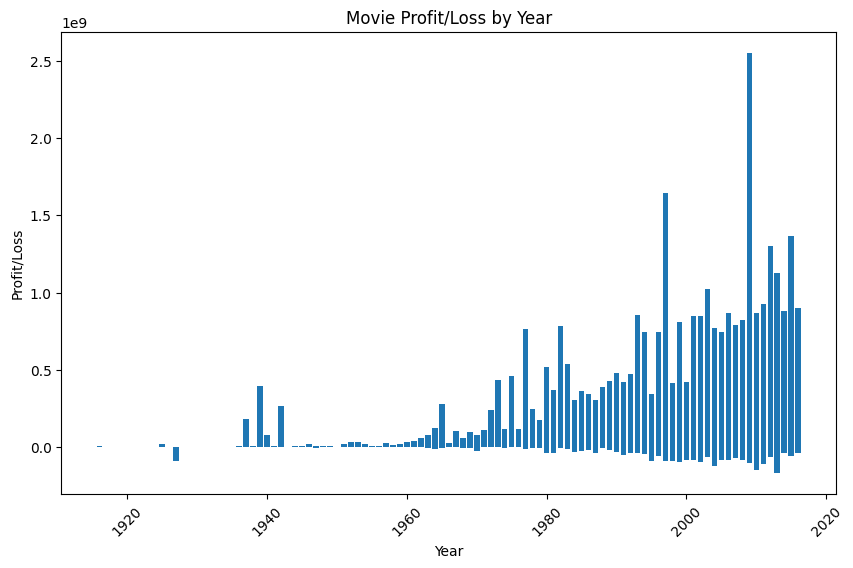

In [356]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(profit_year_sorted_df['year'], profit_year_sorted_df['profit_loss'])
plt.xlabel('Year')
plt.ylabel('Profit/Loss')
plt.title('Movie Profit/Loss by Year')
plt.xticks(rotation=45)
plt.show()

The top 3 most profitable movies were released in: 2009, 1997 and 2015

In [362]:
runtime_vote_average_sorted_df = profit_sorted_movies_df[['runtime', 'vote_average']].sort_values('runtime', ascending=False)
runtime_vote_average_sorted_df.head(10)

,runtime,vote_average
2384,338.0,6.7
1125,248.0,6.7
3813,238.0,7.7
1663,229.0,8.2
4497,225.0,7.1
1109,219.0,6.4
2550,216.0,7.8
855,214.0,6.1
4535,207.0,8.2
1387,202.0,7.2


In [363]:
runtime_vote_average_sorted_df = profit_sorted_movies_df[['runtime', 'vote_average']].sort_values('runtime', ascending=True)
runtime_vote_average_sorted_df.head(10)

,runtime,vote_average
3809,0.0,5.2
4241,0.0,3.5
3626,41.0,5.9
3471,42.0,8.0
4756,47.0,6.9
1620,63.0,6.8
4774,64.0,6.0
4673,66.0,5.1
3663,67.0,3.0
4493,68.0,4.8


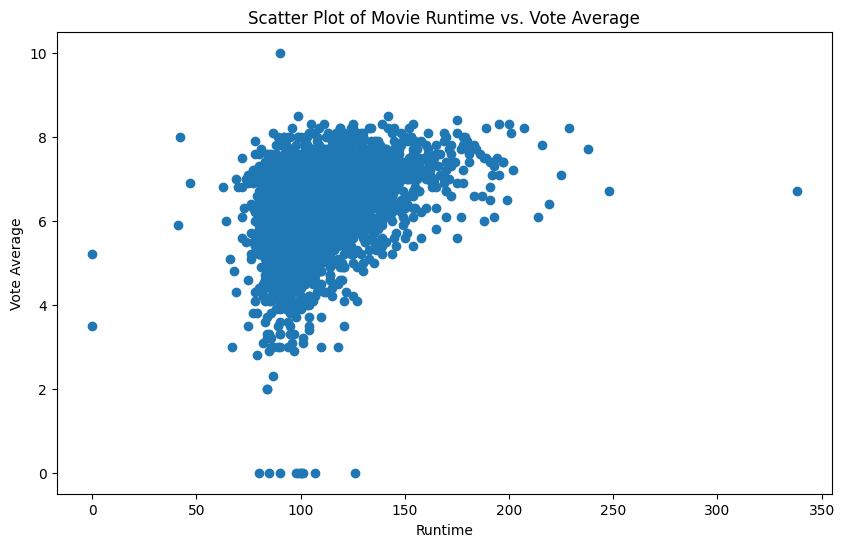

In [364]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_movies_df['runtime'], filtered_movies_df['vote_average'])
plt.xlabel('Runtime')
plt.ylabel('Vote Average')
plt.title('Scatter Plot of Movie Runtime vs. Vote Average')
plt.show()

Most of the most liked movies have a runtime of around 100 minutes

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)